# 로지스틱 회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

# 머신러닝 기본 3단계

# data import
df_fish = pd.read_csv('./fish_data.csv')

# ttsplit
X_train, X_test, y_train, y_test = train_test_split(df_fish.drop('Species', axis=1).to_numpy(), df_fish['Species'].to_numpy(), random_state=42)

# scaling
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [2]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)  # 주변 3개만 확인
kn.fit(X_train, y_train)
# print(kn.score(X_train, y_train), kn.score(X_test, y_test))
print(kn.classes_)  # 클래스 목록
print(kn.predict(X_test[:5]))  # 5개만 빼서 데이터 예측
print(kn.predict_proba(X_test[:5]).round(3))  # 테스트 데이터가 특정 생선일 확률 - 클래스 목록 순서대로 나옴

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.667 0.    0.333 0.    0.   ]
 [0.    0.    0.667 0.    0.333 0.    0.   ]]


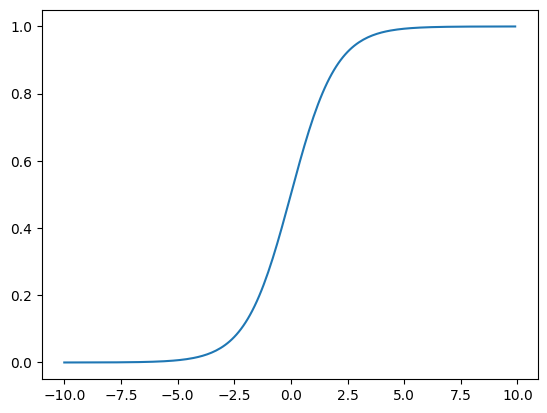

In [7]:
# 로지스틱 회귀

# 시그모이드 함수 이용함
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-10, 10, 0.1)
plt.plot(x, sigmoid(x))
plt.show()
# 아무리 x가 커져도, y값은 항상 0에서 1 사이에 존재하게 됨.

## 이진분류

In [4]:
# Bream, Smelt 만 남김
X_train_bs, X_test_bs, y_train_bs, y_test_bs = train_test_split(df_fish.drop('Species', axis=1).to_numpy(), df_fish['Species'].to_numpy(), random_state=42)

ss = StandardScaler()
ss.fit(X_train_bs)
X_train_bs = ss.transform(X_train_bs)
X_test_bs = ss.transform(X_test_bs)

index = (y_train_bs == 'Bream') | (y_train_bs == 'Smelt')

X_train_bs = X_train_bs[index]
y_train_bs = y_train_bs[index]

In [43]:
# 로지스틱 회귀 학습
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_bs, y_train_bs)
print('classes:', lr.classes_)

# 계수, 절편
print('coef:', lr.coef_[0], 'intercept:', lr.intercept_)
# Z값 = 각 변수에 계수를 곱하고 절편을 더한 결과

# 계산한 Z값 - smelt에 대해서 계산 - smelt인 이유는 그냥 알파벳순으로 뒤쪽이라...
print('\n========= 계산한 Z값 =========')
decisions = lr.decision_function(X_train_bs[:5])
print(decisions)

# Z값에 시그모이드를 돌린 결과
print('\n========= Z값 -> 시그모이드 함수 결과 =========')

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

print(sigmoid(decisions))

# 로지스틱 회귀에서 예측한 확률
print('\n========= 로지스틱 회귀로 예측한 확률 =========')
print(lr.predict_proba(X_train_bs[:5]))
print('=>', lr.predict(X_train_bs[:5]))

# 예측 확률(오른쪽, smelt)과 시그모이드 결과가 완벽하게 똑같다(왼쪽은 1에서 뺀 값)

classes: ['Bream' 'Smelt']
coef: [-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131] intercept: [-2.16172774]

========= 계산한 Z값 =========
[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]

========= Z값 -> 시그모이드 함수 결과 =========
[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]

========= 로지스틱 회귀로 예측한 확률 =========
[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]
=> ['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


## 다중분류
sigmoid가 아니라 softmax 함수를 쓰긴 하지만, 하는 일은 똑같음

같은 logistic regression에서, 분류 대상이 이진인지 다중인지에 따라서 내부 동작이 달라진다

In [65]:
# softmax - Z값에 대해 계산하면, 총합이 1이 되게 만들어야 함
# 일반적으로 총합이 1이 되게 하려면, 값들을 다 더해서 값/총합을 하면 됨

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

# 근데 그냥 더하는 게 아니라 e^x를 이용함

In [100]:
from sklearn.linear_model import LogisticRegression

# C: 규제, max_iter: 반복횟수제한 -> 노가다성이 있다는 것
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(X_train, y_train)
print('train score:', lr.score(X_train, y_train),'\ntest score :', lr.score(X_test, y_test))
print('classes:', lr.classes_)

print('\n=== 계수 및 절편 ===')
print('coef, intercept:')
for i in range(len(lr.intercept_)):
    print(f'변수{i+1}:', lr.coef_.round(3)[i], lr.intercept_.round(3)[i])  # 각 변수에 대해, 분류별로 점수가 얼마나 나올지 만들어둔것

train score: 0.9327731092436975 
test score : 0.925
classes: ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']

=== 계수 및 절편 ===
coef, intercept:
변수1: [-1.506 -1.037  2.609  7.694 -1.186] -0.103
변수2: [ 0.192 -2.    -3.796  6.503 -2.   ] -0.273
변수3: [ 3.558  6.37  -8.522 -5.754  3.792] 3.244
변수4: [-0.115  3.611  3.945 -3.622 -1.76 ] -0.176
변수5: [-1.408 -6.092  5.286 -0.867  1.845] 2.65
변수6: [-1.334  1.482  1.382 -5.66  -4.392] -6.72
변수7: [ 0.613 -2.332 -0.904  1.706  3.701] 1.378


In [94]:
print('========= 계산한 Z값 =========')
decisions = lr.decision_function(X_train[:5])
print(decisions.round(3))

print('\n========= Z값 -> softmax 함수 결과 =========')

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

for decision in decisions:
    print(softmax(decision).round(3))

# 확률 계산
print('\n========= 확률 계산(softmax 결과와 같음) =========')
print(lr.predict_proba(X_train[:5]).round(3))
print('=>', lr.predict(X_train[:5]))

========= 계산한 Z값 =========
[[ 13.056   5.65   -3.369  -3.353   2.166 -20.802   6.652]
 [ -2.307 -12.426   5.518  12.328   1.397  -1.361  -3.149]
 [-11.891   2.321   5.388  -3.188   3.199   8.304  -4.132]
 [ -6.05   -1.458   5.979  -1.471   4.119  -1.609   0.489]
 [  0.116   4.598  -0.178  -3.968   3.171  -4.277   0.539]]

========= Z값 -> softmax 함수 결과 =========
[0.998 0.001 0.    0.    0.    0.    0.002]
[0.    0.    0.001 0.999 0.    0.    0.   ]
[0.    0.002 0.051 0.    0.006 0.941 0.   ]
[0.    0.001 0.861 0.001 0.134 0.    0.004]
[0.009 0.783 0.007 0.    0.188 0.    0.014]

========= 확률 계산(softmax 결과와 같음) =========
[[0.998 0.001 0.    0.    0.    0.    0.002]
 [0.    0.    0.001 0.999 0.    0.    0.   ]
 [0.    0.002 0.051 0.    0.006 0.941 0.   ]
 [0.    0.001 0.861 0.001 0.134 0.    0.004]
 [0.009 0.783 0.007 0.    0.188 0.    0.014]]
=> ['Bream' 'Pike' 'Smelt' 'Perch' 'Parkki']
